In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array


In [6]:
# Load image using OpenCV and resize to 128x128
img = cv2.imread('dataset/drone1.webp')  # Replace with your own image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (128, 128))

# Convert to array and expand dimensions to create batch of 1
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

In [7]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


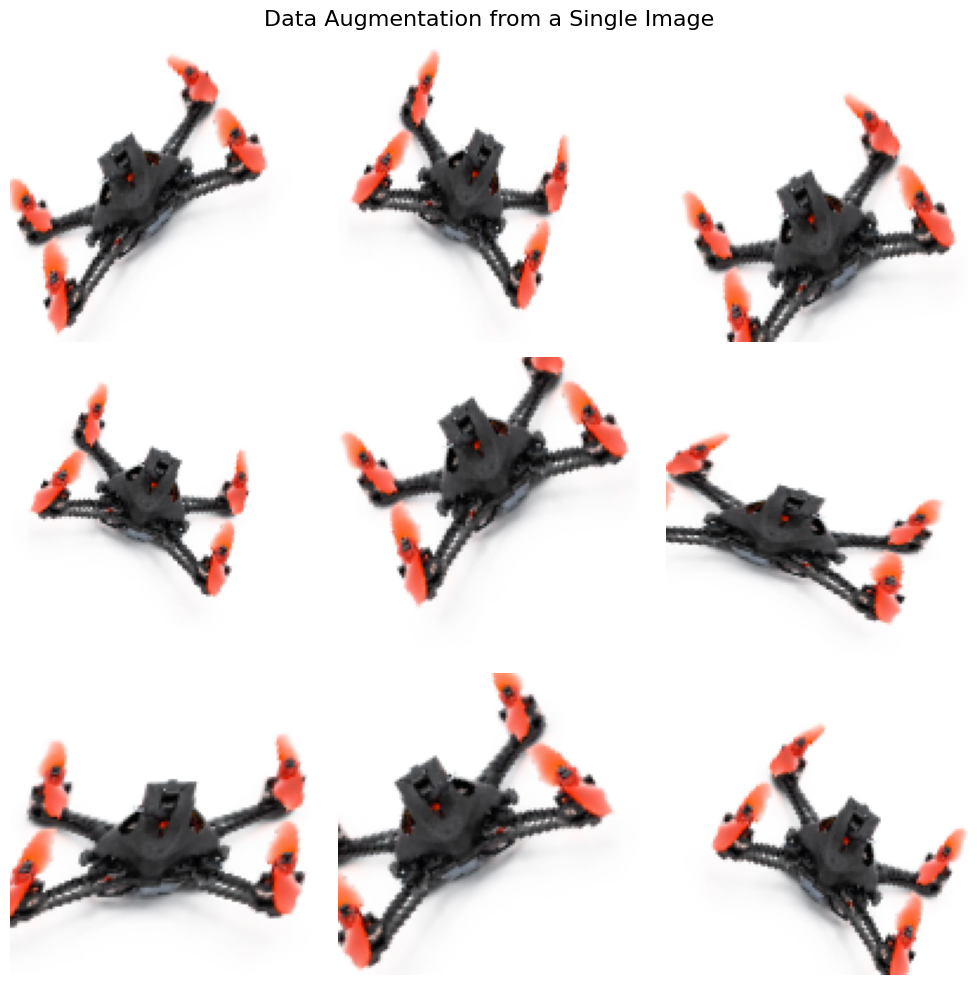

In [8]:
# Generate and plot 9 augmented versions
plt.figure(figsize=(10, 10))
aug_iter = datagen.flow(img_array, batch_size=1)

for i in range(9):
    plt.subplot(3, 3, i + 1)
    aug_img = next(aug_iter)[0].astype('uint8')
    plt.imshow(aug_img)
    plt.axis('off')

plt.suptitle("Data Augmentation from a Single Image", fontsize=16)
plt.tight_layout()
plt.show()
